In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten
# Dropout Regularisation: To get rid of overfitting problem
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

- tensorflow - deep learning framework
- keras - wrapper class (internally uses tensorflow as backend)
- sequential - neural networks are sequential
- dense - 
- dropout - regulariation technique, used in every layer to get rid of overfitting problem.

In [ ]:
# Number of classes
num_classes = 10

# sizes of batch and number of epochs
batch_Size = 64
epochs = 24

# (938 iterations for 1 epoch)
# (22512 iterations for 24 epochs)

# input image dimensions (resizing image)
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test,y_test) =fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

CNNs expect input with channels

Convolutional Neural Networks (CNNs) in frameworks like TensorFlow/Keras expect inputs in the format:

(batch_size, height, width, channels)

For grayscale images:

There’s only 1 color channel (intensity values, not RGB).
For color (RGB) images, you’d have 3 channels instead.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_cols , 1)

# Meaning:
# 60000 images
# Each 28x28 pixels
# 1 grayscale channel

In [ ]:
x_train.shape

(60000, 28, 28, 1)

Step 1: Type conversion

Why:
- The original image data (like MNIST) is usually in uint8 format (unsigned integers) → values range from 0 to 255.
- Neural networks (especially CNNs) work best with floating-point numbers (like float32) for efficient gradient computations.
- Converting to float32 allows for decimal values (needed when normalizing or scaling).
- So this converts pixel values from integer form to floating-point for smoother mathematical operations.


Step 2: Scaling / Normalization

Why:
- Each pixel value in an image ranges from 0 to 255.
- Dividing by 255 scales all pixel values to the range 0 → 1.
- Neural networks converge faster and more stably when inputs are on a smaller, consistent scale (typically 0–1 or -1–1).

In [ ]:
# Type convert and scale the test and the training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

print(y_train[0:3])
# In y_train eahc number represents class id of image

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0]


Dense(10, activation='softmax')
- This layer outputs 10 probabilities, one for each class.
- For example: 
- [0.01, 0.02, 0.80, 0.05, 0.03, 0.02, 0.01, 0.01, 0.03, 0.02]
- This means the model thinks the image is 80% likely to be class 2.

Why One-Hot Encoding is Needed
- The model output and the target labels must have the same shape for computing the loss function.

So we convert integer labels into one-hot vectors :
- Original	One-hot encoded
- 3	        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
- 1           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:

# convert class vectors to binary class matrices. One-hot encoding
# 3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0

y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(y_train[0:2]) # verify one-hot-encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### CNN Code

In [ ]:
# Define the model
model = Sequential ()

In [ ]:
# Create a CNN to classify the images


model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape = input_shape)) 
# 32 filters (feature detectors) of size 3×3 to the image

model.add(MaxPooling2D(pool_size=(2,2)))
# downsamples the image by taking the maximum value in each 2×2 window.


model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# These layers act like a classic neural network. They learn abstract relationships between the extracted features and the output classes. 128 and 64 are the number of neurons (you can think of them as units combining different features).

# Randomly “drops out” (turns off) 50% of neurons during training. Helps prevent overfitting (memorizing training data instead of generalizing).
model.add(Dropout(0.5))

# Output Layer
# Final layer has 10 neurons, one for each Fashion MNIST class. Softmax converts raw scores into probabilities that sum to 1.
model.add(Dense(num_classes,activation='softmax'))

c:\Users\HP\Desktop\Interview Prep\AI Engineer\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# define compile to minimise categorical loss, use ada delta optimised, and optimise to maximum accuracy

model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])

# Train the model and test/validate the model with the test data after each cycle (epoch) through the training data. Return the history of loss and accuracy for each epoch

hist = model.fit(x_train, y_train, batch_size= batch_Size,epochs=epochs, verbose =1, validation_data =(x_test,y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.6643 - loss: 0.9377 - val_accuracy: 0.8362 - val_loss: 0.4434
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 45ms/step - accuracy: 0.8495 - loss: 0.4359 - val_accuracy: 0.8727 - val_loss: 0.3501
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.8744 - loss: 0.3573 - val_accuracy: 0.8814 - val_loss: 0.3282
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.8880 - loss: 0.3171 - val_accuracy: 0.8969 - val_loss: 0.2877
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.8996 - loss: 0.2896 - val_accuracy: 0.8948 - val_loss: 0.2904
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 112s 79ms/step - accuracy: 0.9063 - loss: 0.2684 - val_accuracy: 0.8968 - val_loss: 0.2848
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 74ms/step - accuracy: 0.9115 - loss: 0.2488 - val_accuracy: 0.9050 - val_loss: 0.2682
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9186 - loss: 0.2296 -

You told your CNN what to learn (loss), how to learn (optimizer), and what to measure (accuracy).
Then you ran training (fit) to let it see images repeatedly and adjust its filters and weights until it can classify fashion items correctly.

Test Loss: 0.40550515055656433
Test Accuracy: 0.9096999764442444


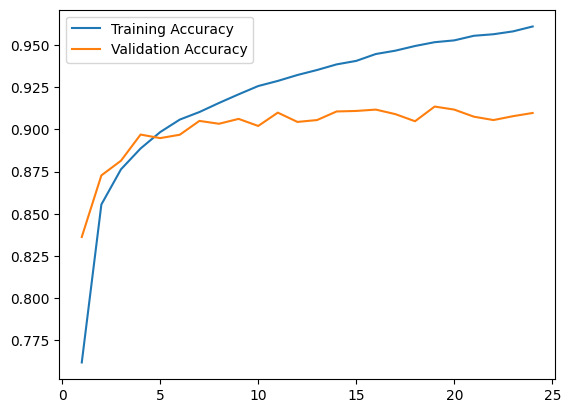

In [ ]:
# Evaluate the model with the test data to get the "scores" on the "real" data.

score = model.evaluate(x_test, y_test, verbose =0)
print("Test Loss:", score[0])
print('Test Accuracy:', score[1])

# Plot the data to see relationships in training and validation set

import matplotlib.pyplot as plt
%matplotlib inline

epoch_list = list(range(1, len(hist.history['accuracy']) +1)) # values for x axis [1, 2, ....., 24]

plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy','Validation Accuracy'))
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

![image.png](attachment:image.png)

Interpretation:

Parameters = weights + biases that your model learns during training.

Weights: control how inputs connect to outputs.

Biases: help the model shift activation functions for better learning.

Non-trainable params = 0 here → all layers are learnable.

Param #” in model.summary() shows how many internal weights (numbers) the network will adjust during training.